### Installing Emnist dataset

In [1]:
pip install emnist

Note: you may need to restart the kernel to use updated packages.


### Importing necessary libraries

In [13]:
import tensorflow
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [14]:
from emnist import list_datasets

In [15]:
# All classes in the emnist dataset
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [16]:
from emnist import extract_training_samples, extract_test_samples

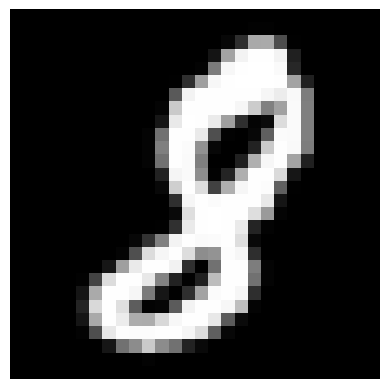

In [17]:
# Checking my dataset

import matplotlib.pyplot as plt

# Load the EMNIST dataset
x_train, y_train = extract_training_samples('digits')
x_test, y_test = extract_test_samples('digits')
# Display an image from the training dataset
plt.imshow(x_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [18]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

x_train.shape, x_test.shape

((240000, 28, 28, 1), (40000, 28, 28, 1))

In [19]:
# One hot encode target values
y_train = tensorflow.keras.utils.to_categorical(y_train)
y_test = tensorflow.keras.utils.to_categorical(y_test)

In [20]:
# Load the pre-trained CNN MNIST model
base_model = tensorflow.keras.models.load_model('mnist_model.h5')

In [26]:
# Modify the architecture
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [27]:
# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=output)

In [28]:
# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [29]:
# Compile the model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Train the model
transfer_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
3750/3750 [==============================] - 56s 15ms/step - loss: 0.1947 - accuracy: 0.9590 - val_loss: 0.1436 - val_accuracy: 0.9655
Epoch 2/5
3750/3750 [==============================] - 63s 17ms/step - loss: 0.1365 - accuracy: 0.9676 - val_loss: 0.1314 - val_accuracy: 0.9687
Epoch 3/5
3750/3750 [==============================] - 54s 14ms/step - loss: 0.1249 - accuracy: 0.9698 - val_loss: 0.1220 - val_accuracy: 0.9701
Epoch 4/5
3750/3750 [==============================] - 56s 15ms/step - loss: 0.1170 - accuracy: 0.9709 - val_loss: 0.1141 - val_accuracy: 0.9706
Epoch 5/5
3750/3750 [==============================] - 85s 23ms/step - loss: 0.1108 - accuracy: 0.9716 - val_loss: 0.1086 - val_accuracy: 0.9714


In [31]:
# Evaluate the model
score = transfer_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10862409323453903
Test accuracy: 0.9714499711990356


In [37]:
import numpy as np

# Predictions on the test set

# Single value prediction in number
# Taking the 57th image from the test set and returns the index of the class with the highest probability
predictions = transfer_model.predict(x_test, verbose = 0)
print(np.argmax(np.round(predictions[999])))

7


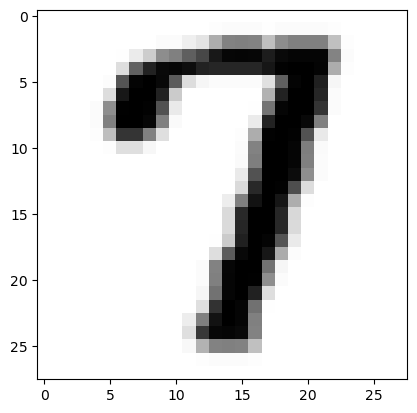

In [38]:
# Single value prediction in graph (plot)

# This will display the binary image corresponding to the 57th test sample from the MNIST dataset
plt.imshow(x_test[999].reshape(28,28), cmap = plt.cm.binary)
plt.show()